In [307]:
from PIL import Image, ImageDraw, ImageFont, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import textwrap
import requests
from io import BytesIO
import json
%matplotlib inline

In [317]:
with open('specs.json') as json_file:
    userdata = json.load(json_file)

In [333]:
# user info
firstname       = userdata['firstname']
lastname        = userdata['lastname']
affiliation     = userdata['affiliation']
org_logo_url    = userdata['orglogo']
role_logo_url   = userdata['rolelogo']
expert_logo_url = userdata['expertlogo']
is_expert       = userdata['isexpert']
primary_sg      = userdata['primarysg']
secondary_sg_1  = userdata['secondarysg1']
secondary_sg_2  = userdata['secondarysg2']
secondary_sg_3  = userdata['secondarysg3']
secondary_sg_4  = userdata['secondarysg4']

primary_p = userdata['peoplesprimary']
secondary_p = []
for i in range(1,5):
    if userdata['peoplessecondary'+str(i)] != -1:
        secondary_p.append(userdata['peoplessecondary'+str(i)])

In [324]:
peoples_tags = ['P','E','O','P','L','E','S']

In [327]:
# Calibri takes roughly 13 characters for 500 at font size 75 and roughly 20 characters for 500 at font size 50
c_width = 500/13
img_w = 500
img_h = int(np.round(img_w*1.588))
org_logo_size = 120
sg_logo_size = 110

In [328]:
def addtext(draw,text,width,img_w,img_h,curr_h,pad_h,font_size):
    para = textwrap.wrap(text, width=width)
    fnt = ImageFont.truetype('/Library/Fonts/Microsoft/Calibri Bold.ttf', font_size)
    for line in para:
        w, h = draw.textsize(line, font=fnt)
        draw.text(((img_w - w) / 2, curr_h), line, font=fnt,fill=(0, 0, 0))
        curr_h += h + pad_h
    return draw,curr_h

In [334]:
img = Image.new('RGB', (img_w,img_h), color = (255,255,255))
draw = ImageDraw.Draw(img)
curr_h = 20
pad_h = 10
#name
draw, curr_h = addtext(draw,firstname+' '+lastname,20,img_w,img_h,curr_h,pad_h,60)
#affiliation
draw, curr_h = addtext(draw,affiliation,20,img_w,img_h,curr_h+30,pad_h,40)
# logos
curr_h = curr_h + 30
response = requests.get(org_logo_url)
org_logo_img = Image.open(BytesIO(response.content))
o_s = org_logo_img.size
org_logo_img_resized = org_logo_img.resize((org_logo_size,org_logo_size),resample=Image.BICUBIC)
response = requests.get(role_logo_url)
role_logo_img = Image.open(BytesIO(response.content))
r_s = role_logo_img.size
role_logo_img_resized = role_logo_img.resize((org_logo_size,org_logo_size),resample=Image.BICUBIC)
if is_expert:
    response = requests.get(expert_logo_url)
    expert_logo_img = Image.open(BytesIO(response.content))
    e_s = expert_logo_img.size
    expert_logo_img_resized = expert_logo_img.resize((org_logo_size,org_logo_size),resample=Image.BICUBIC)
if not is_expert:
    img.paste(org_logo_img_resized,(50,curr_h))
    img.paste(role_logo_img_resized,(50+int(img_w/2),curr_h))
else:
    img.paste(org_logo_img_resized,(30,curr_h))
    img.paste(role_logo_img_resized,(int(img_w/2-org_logo_size/2),curr_h))
    img.paste(expert_logo_img_resized,(80+int(img_w/2),curr_h))

# sustainability goals
curr_h = curr_h + sg_logo_size + 80
response = requests.get(primary_sg)
sg_p_img = Image.open(BytesIO(response.content))
p_s = sg_p_img.size
sg_p_img_resized = sg_p_img.resize((2*sg_logo_size,2*sg_logo_size),resample=Image.BICUBIC)
img.paste(sg_p_img_resized,(30,curr_h))

response = requests.get(secondary_sg_1)
sg_p_img = Image.open(BytesIO(response.content))
p_s = sg_p_img.size
sg_p_img_resized = sg_p_img.resize((sg_logo_size,sg_logo_size),resample=Image.BICUBIC)
img.paste(sg_p_img_resized,(30+(2*sg_logo_size)+2,curr_h))

response = requests.get(secondary_sg_2)
sg_p_img = Image.open(BytesIO(response.content))
p_s = sg_p_img.size
sg_p_img_resized = sg_p_img.resize((sg_logo_size,sg_logo_size),resample=Image.BICUBIC)
img.paste(sg_p_img_resized,(30+(3*sg_logo_size)+4,curr_h))

response = requests.get(secondary_sg_3)
sg_p_img = Image.open(BytesIO(response.content))
p_s = sg_p_img.size
sg_p_img_resized = sg_p_img.resize((sg_logo_size,sg_logo_size),resample=Image.BICUBIC)
img.paste(sg_p_img_resized,(30+(2*sg_logo_size)+2,curr_h+sg_logo_size))

response = requests.get(secondary_sg_4)
sg_p_img = Image.open(BytesIO(response.content))
p_s = sg_p_img.size
sg_p_img_resized = sg_p_img.resize((sg_logo_size,sg_logo_size),resample=Image.BICUBIC)
img.paste(sg_p_img_resized,(30+(3*sg_logo_size)+4,curr_h+sg_logo_size))

# PEOPLES framework tags
curr_h = curr_h + 2*sg_logo_size + 10
offset = 25
fnt = ImageFont.truetype('/Library/Fonts/Microsoft/Calibri Bold.ttf', 70)
i = 1
for p in peoples_tags:
    fill = (192,192,192)
    if i == primary_p:
        fill = (220,20,60)
    if i in secondary_p:
        fill = (0,0,0)
    draw.text((offset, curr_h), p, font=fnt,fill=fill)
    offset = offset + 70
    i = i + 1
    
#add a border
img_b = ImageOps.expand(img,border=10,fill='navy')
img_b.save('badge.png',dpi=(300,300))


(-0.5, 519.5, 813.5, -0.5)

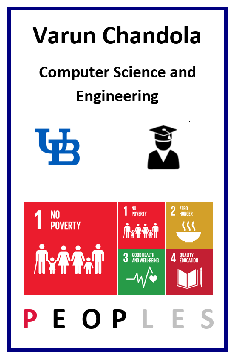

In [335]:
figure = plt.figure(figsize=(4,4*1.588))
plt.imshow(plt.imread('badge.png'))
plt.axis('off')
